## Demonstrating how the Batch Gradient Descent Optimization algorithm, Stochastic Gradient Descent Optimization algorithm, and Mini-Batch Gradient Descent Optimization algorithm look like
However, do note that the codes here are all purely for demonstration purposes, for your understanding. It is very unlikely that you will need to implement these Gradient Descent Optimization algorithm yourself when building Neural Networks, since DL libraries like PyTorch, TensorFlow and Keras, which you will most likely use when building Neural Networks, has already integrated all these in their ready-made API functions.

We'll be going through 3 types of the most common Gradient Descent Optimization algorithm used in Neural Networks:
- Batch Gradient Descent Optimization algorithm
- Stochatic Gradient Descent Optimization algorithm
- Mini-Batch Gradient Descent Optimization algorithm

You may think of:
- the ML algorithm being used here is the MVLR ML algorithm. (not Neural Networks (NN)!) (for demonstration purposes)
- the Cost Function being used here is the Mean Square Error (MSE) Cost Function

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

import random

In [37]:
df = pd.read_csv("homeprices_banglore.csv")
print(df.sample(5))

    area  bedrooms  price
11  2785         4  140.0
15  1175         2   42.0
4   1200         2   51.0
8   1310         3   50.0
5   1170         2   38.0


In [38]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
print(scaled_x)

scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
print(scaled_y)

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


### Batch Gradient Descent

In [95]:
def batch_gradient_descent_optimization_algorithm(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]

    # Initializing the weights and biases
    weights = np.ones(shape=(number_of_features))
    biases = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(weights, scaled_x.T) + biases     # w1 * area + w2 * bedrooms + biases

        weights_grad = -(2 / total_samples) * (x.T.dot(y_true - y_predicted))
        biases_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        weights = weights - learning_rate * weights_grad
        biases = biases - learning_rate * biases_grad

        cost = np.mean(np.square(y_true - y_predicted))

        # I dont really want to record learning progress (cost) graph every iteration, maybe every 10 iterations on 
        # the learning progress (cost) graph instead
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, biases, cost, cost_list, epoch_list


# Doing 500 epochs
weights, biases, cost, cost_list, epoch_list = batch_gradient_descent_optimization_algorithm(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 500)
print(weights, biases, cost)

[0.70712464 0.67456527] -0.23034857438407427 0.0068641890429808105


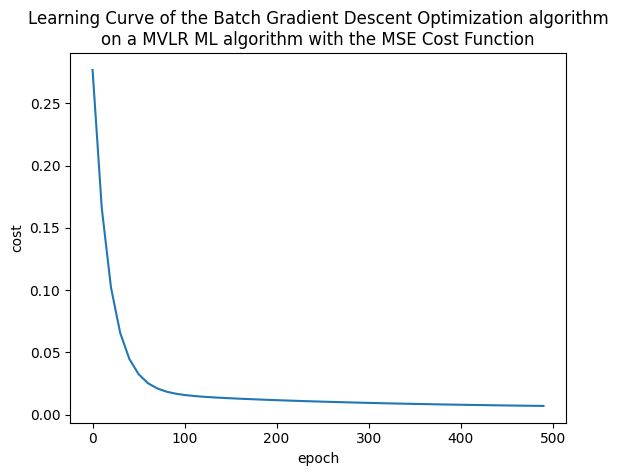

In [96]:
# Plotting the learning curve of the Batch Gradient Descent Optimization algorithm on a MVLR ML algorithm with the MSE Cost Function
plt.title("Learning Curve of the Batch Gradient Descent Optimization algorithm\non a MVLR ML algorithm with the MSE Cost Function")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

# Note that the learning curve of the Batch Gradient Descent Optimization algorithm is smooth

In [41]:
def predict(area, bedrooms, weights, biases):
    scaled_x = sx.transform([[area, bedrooms]])[0]

    scaled_price = weights[0] * scaled_x[0] + weights[1] * scaled_x[1] + biases
    return sy.inverse_transform([[scaled_price]])


# Trying to make predictions with Batch Gradient Descent on existing rows in the 'homeprices_banglore.csv'
print(predict(2600, 4, weights, biases))    # Prediction: 128.45    Actual: 120
print(predict(1000, 2, weights, biases))    # Prediction: 30.25     Actual: 38
print(predict(1200, 2, weights, biases))    # Prediction: 36.84     Actual: 51

[[128.45484403]]
[[30.25309446]]
[[36.83666872]]


c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Stochastic Gradient Descent

In [ ]:
def stochastic_gradient_descent_optimization_algorithm(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]

    # Initializing the weights and biases
    weights = np.ones(shape=(number_of_features))
    biases = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):

        # ////////////////////////////////////////////////////////

        # Only these lines of code are different in Stochastic Gradient Descent compared to Batch Gradient Descent
        # (the rest have minor difference but are more or less the same logic)
        # Getting a random training sample in the dataset (by selecting a random index)
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]

        # ////////////////////////////////////////////////////////

        y_predicted = np.dot(weights, sample_x.T) + biases     # w1 * area + w2 * bedrooms + biases

        weights_grad = -(2 / 1) * (sample_x.T.dot(sample_y - y_predicted))   # denominator is not 'total_samples' but 1 instead since Stochastic
        biases_grad = -(2 / 1) * (sample_y - y_predicted)                    # Gradient Descent only takes 1 training example per epoch

        weights = weights - learning_rate * weights_grad
        biases = biases - learning_rate * biases_grad

        cost = np.square(sample_y - y_predicted)        # we dont do np.mean here for Stochastic Gradient Descent

        # I dont really want to record learning progress (cost) graph every iteration, maybe every 100 iterations on 
        # the learning progress (cost) graph instead
        if i % 100 == 0:        # we do modulo 100 here instead of 10 cuz theres a lot of epoch in Stochastic Gradient Descent compared to Batch Gradient Descent
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, biases, cost, cost_list, epoch_list


# Doing 10000 epoch for Stochastic Gradient Desent instead of 500 epochs in Batch Gradient Descent...
# Need do more epochs because Stochastic Gradient Descent uses less training examples per epoch compared to Batch
# Gradient Descent, hence need more epoch to find the best set of weights and biases

# weights_sgd, biases_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent_optimization_algorithm(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 500)
weights_sgd, biases_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent_optimization_algorithm(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 10000)
print(weights_sgd, biases_sgd, cost_sgd)

[0.83435796 0.31509537] -0.10125422236501516 0.002629192502822149


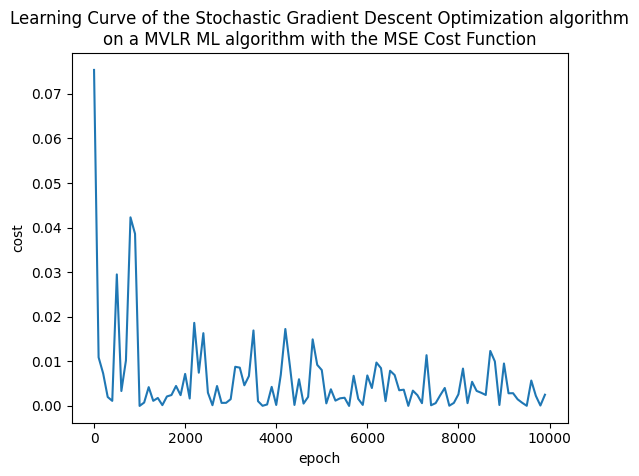

In [79]:
# Plotting the learning curve of the Stochastic Gradient Descent Optimization algorithm on a MVLR ML algorithm with the MSE Cost Function
plt.title("Learning Curve of the Stochastic Gradient Descent Optimization algorithm\non a MVLR ML algorithm with the MSE Cost Function")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

# Note that the learning curve of the Stochastic Gradient Descent Optimization algorithm is jaggered and fluctuates

In [ ]:
# Trying to make predictions with Stochastic Gradient Descent on existing rows in the 'homeprices_banglore.csv'
print(predict(2600, 4, weights_sgd, biases_sgd))    # Prediction: 120.15    Actual: 120
print(predict(1000, 2, weights_sgd, biases_sgd))    # Prediction: 36.73     Actual: 38
print(predict(1200, 2, weights_sgd, biases_sgd))    # Prediction: 44.50     Actual: 51

[[120.14752951]]
[[36.73330911]]
[[44.50146947]]


c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Excercises

### Excercise 1

Implement mini-batch gradient descent in python and plot cost vs epoch graph. 

Mini batch is intermediate version of batch GD and stochastic GD. In stochastic GD we used one randomly picked training sample, In mini-batch GD you will use a batch of samples in each iterations. 

For example:  
If you have total 50 training samples, you can take a batch of 10 samples, calculate cumulative error for those 10 samples and then adjust weights. 

In stochastic GD we adjust weights after every one sample. In batch GD we adjust weights after going through all samples but in mini-batch GD we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples).

### Mini-Batch Gradient Descent

In [101]:
def mini_batch_gradient_descent_optimization_algorithm(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]

    # Initializing the weights and biases
    weights = np.ones(shape=(number_of_features))
    biases = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    batch_size = 5
    num_batches = int(total_samples/batch_size)

    for i in range(epochs):

        # ////////////////////////////////////////////////////////

        # Only these lines of code are different in Mini-Batch Gradient Descent compared to Batch Gradient Descent
        # (the rest have minor difference but are more or less the same logic)
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(weights, Xj.T) + biases
            
            weights_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            biases_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            weights = weights - learning_rate * weights_grad
            biases = biases - learning_rate * biases_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        # ////////////////////////////////////////////////////////

        # y_predicted = np.dot(weights, sample_x_list.T) + biases     # w1 * area + w2 * bedrooms + biases

        # weights_grad = -(2 / batch_size) * (sample_x_list.T.dot(sample_y_list - y_predicted))
        # biases_grad = -(2 / batch_size) * np.sum(sample_y_list - y_predicted)

        # weights = weights - learning_rate * weights_grad
        # biases = biases - learning_rate * biases_grad

        # cost = np.mean(np.square(sample_y_list - y_predicted))        # we dont do np.mean here

        # I dont really want to record learning progress (cost) graph every iteration, maybe every 50 iterations on 
        # the learning progress (cost) graph instead
        if i % 50 == 0:        # we do modulo 50 here instead of 100 cuz theres less epoch in Mini-Batch Gradient Descent compared to Stochastic Gradient Descent
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, biases, cost, cost_list, epoch_list


# Doing 5000 epoch for Mini-Batch Gradient Desent instead of 10000 epochs in Stochastic Gradient Descent...
# Need do less epochs because Mini-Batch Gradient Descent uses more training examples per epoch compared to Stochastic
# Gradient Descent, hence need less epoch to find the best set of weights and biases

# weights_mbgd, biases_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini-batch_gradient_descent_optimization_algorithm(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 500)
weights_mbgd, biases_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent_optimization_algorithm(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 5000)
print(weights_mbgd, biases_mbgd, cost_mbgd)

[0.90321074 0.227048  ] -0.07896878711894698 0.003368169906175123


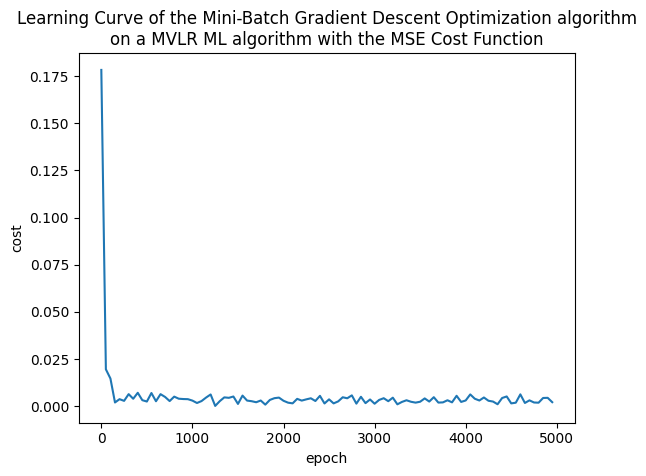

In [102]:
# Plotting the learning curve of the Mini-Batch Gradient Descent Optimization algorithm on a MVLR ML algorithm with the MSE Cost Function
plt.title("Learning Curve of the Mini-Batch Gradient Descent Optimization algorithm\non a MVLR ML algorithm with the MSE Cost Function")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.show()

# Note that the learning curve of the Mini-Batch Gradient Descent Optimization algorithm is also jaggered and fluctuates, but less compared
# to Stochastic Gradient Descent

In [ ]:
# Trying to make predictions with Mini-Batch Gradient Descent on existing rows in the 'homeprices_banglore.csv'
print(predict(2600, 4, weights_mbgd, biases_mbgd))    # Prediction: 119.98    Actual: 120
print(predict(1000, 2, weights_mbgd, biases_mbgd))    # Prediction: 37.39     Actual: 38
print(predict(1200, 2, weights_mbgd, biases_mbgd))    # Prediction: 45.80     Actual: 51

[[119.98267517]]
[[37.39067523]]
[[45.79953747]]


c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Jet Wei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
